In [2]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

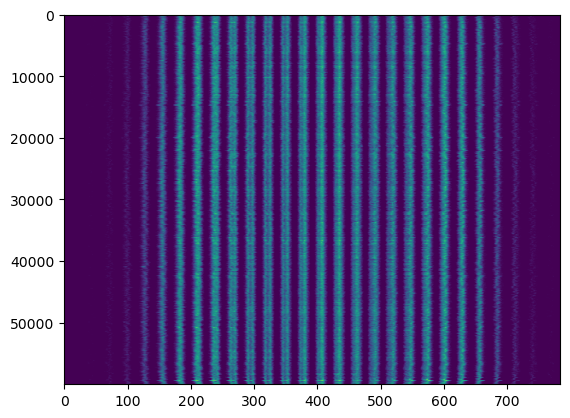

In [86]:
# The image of all the pixels flattened out is jumbled -- it is a mixture of the digits.
plt.imshow(digits, aspect="auto")

In [82]:
# I can sort by the labels, and show them grouped by digit.
digitsordered = digits[np.argsort(labels),:]
digits.shape

(60000, 784)

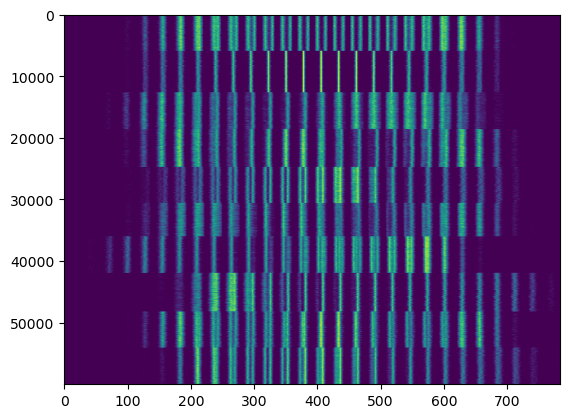

In [85]:
plt.imshow(digitsordered, aspect="auto")

In [4]:
digits = np.array(images)

In [5]:
digits.shape

(60000, 784)

In [6]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [7]:
p.shape

(60000, 28, 28)

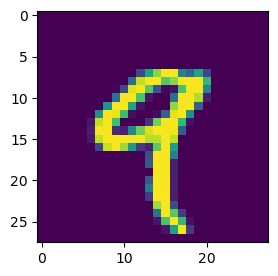

In [25]:
plt.figure(figsize=(8,3))
plt.imshow(p[4,::])

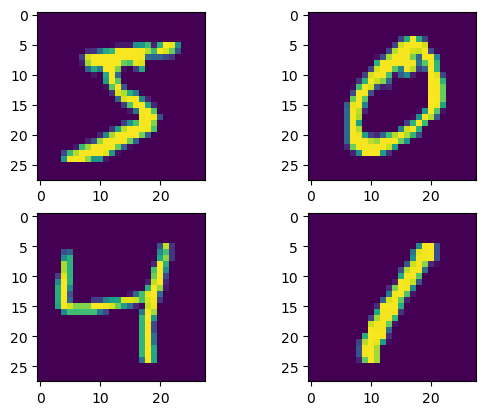

In [26]:
# Show multiple images.. 
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

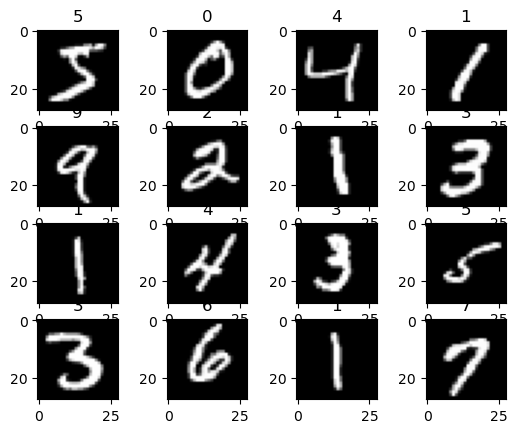

In [27]:
# This level of repetition is a sign I'm not doinig things right..
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(p[i,::], cmap="gray")
    plt.title(str(labels[i]))

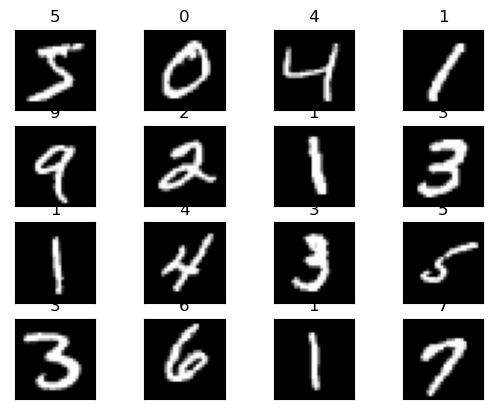

In [14]:
for i in range(16):
    fig = plt.subplot(4,4,i+1)
    plt.imshow(p[i,::], cmap="gray")
    plt.title(str(labels[i]))
    # How to turn off axis labels?
    # https://www.tutorialspoint.com/how-to-turn-off-the-ticks-and-marks-of-a-matlibplot-axes
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_23692/458725346.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot(4,4,i+1)


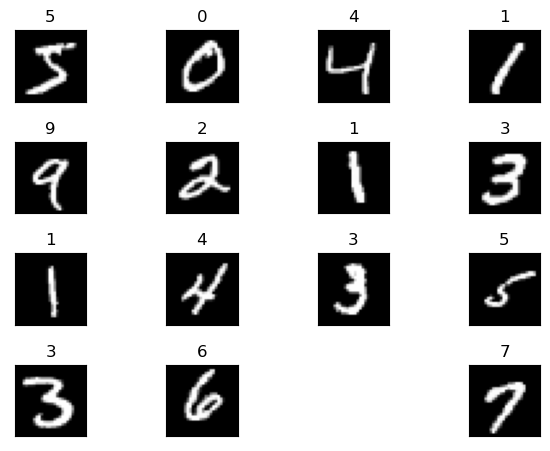

In [30]:
# Labels overlapping... 
for i in range(16):
    fig = plt.subplot(4,4,i+1)
    plt.imshow(p[i,::], cmap="gray")
    plt.title(str(labels[i]))
    plt.tight_layout()

    # How to turn off axis labels?
    # https://www.tutorialspoint.com/how-to-turn-off-the-ticks-and-marks-of-a-matlibplot-axes
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])


In [31]:
ones = np.where(np.array(labels)==8)

In [19]:
ones[0]

array([   17,    31,    41, ..., 59989, 59995, 59999])

In [21]:
labels[0:100]

array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1])

In [22]:
sample = digits[0:1000,:]

Text(70.72222222222221, 0.5, 'samples')

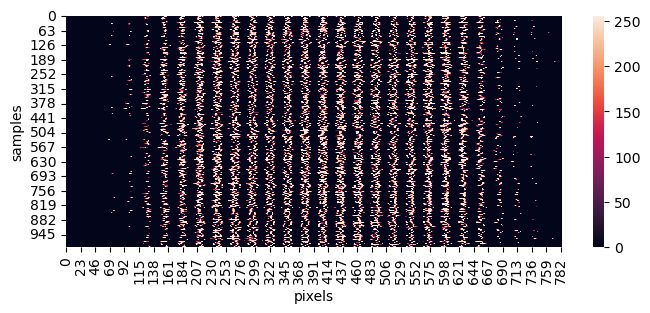

In [24]:
import seaborn as sb
plt.figure(figsize=(8,3))
sb.heatmap(sample)
plt.xlabel("pixels")
plt.ylabel("samples")

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

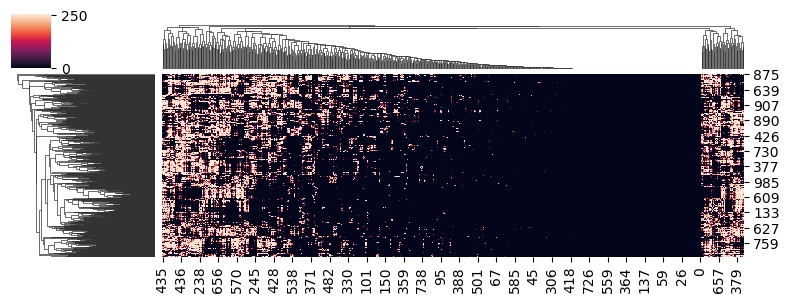

In [37]:
# Wait, this isn't quite what I want.  I want to reorder 
# columns (pixel positions) and rows (sample digits).
plt.figure()
sb.clustermap(sample, figsize=(8,3));

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


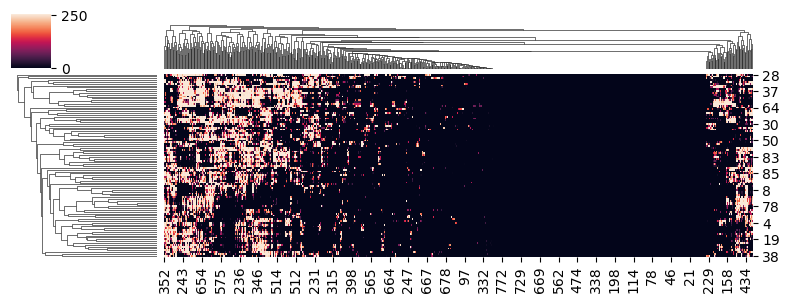

In [38]:
# A little busy, maybe only look at 100 samples?
sb.clustermap(sample[0:100,:], figsize=(8,3));

In [39]:
sb.clustermap(sample[0:100,:], row_colors=labels[0:100])

TypeError: 'int' object is not iterable

<Figure size 1000x1000 with 0 Axes>

In [40]:
# sb.clustermap wants a list of color names for row_colors.  Fine.  

h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels100 = []
for l in labels[0:100]:
    colorlabels100.append(h[l])
colorlabels100

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange',
 'orange',
 'black',
 'purple',
 'yellow',
 'white',
 'grey',
 'black',
 'white',
 'yellow',
 'brown',
 'yellow',
 'yellow',
 'blue',
 'black',
 'yellow',
 'green',
 'blue',
 'brown',
 'black',
 'black',
 'brown',
 'purple',
 'brown',
 'blue',
 'orange',
 'black',
 'red',
 'brown',
 'brown',
 'purple',
 'white',
 'black',
 'red',
 'blue',
 'purple',
 'grey',
 'orange',
 'white',
 'black',
 'yellow',
 'blue',
 'purple',
 'yellow',
 'blue',
 'grey',
 'black',
 'purple',
 'grey',
 'orange',
 'brown']

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


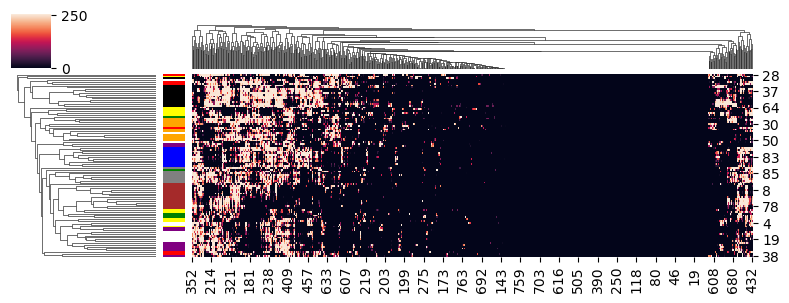

In [41]:
clustermap = sb.clustermap(sample[0:100,:], 
                           row_colors=colorlabels100, 
                          figsize=(8,3));

In [ ]:
# The clustermap library function gives me the data in 
# attributes of the return value:
dir(clustermap)

In [ ]:
# There is data, which is what I gave it, 
plt.imshow(clustermap.data)

In [ ]:
# And data2d, which has been reordered
plt.imshow(clustermap.data2d, aspect="auto")

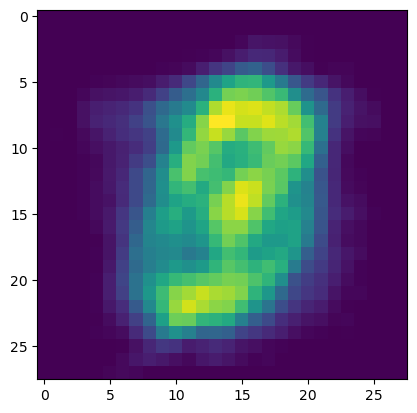

In [42]:
# I can plot what all the digits look like on top of each other
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape( (28,28)))

In [43]:
# And it turns out the indexes for the row- and 
# column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [ ]:
# And it turns out the indexes for the row- and column- 
# reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

In [44]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

[28, 60, 68, 80, 25, 82, 56, 88, 34, 37, 69, 75, 81, 95, 1, 21, 51, 63, 64, 2]

In [45]:
clustermap.dendrogram_col.reordered_ind[0:10]

[352, 325, 353, 436, 435, 407, 380, 408, 547, 574]

In [46]:
digits.shape

(60000, 784)

In [47]:
# So let's get some pieces of this clustergram and plot them on a 28x28 pixel grid:
middlepixels = clustermap.dendrogram_col.reordered_ind[300:600]
endpixels = clustermap.dendrogram_col.reordered_ind[723:]

In [48]:
middle_image = np.zeros((28,28))
end_image = np.zeros((28,28))

In [49]:
middle_image.reshape((784,))[middlepixels] = 1
end_image.reshape((784,))[endpixels] = 1

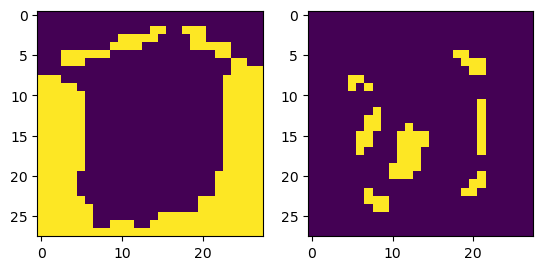

In [50]:
# These are the pixels that were clustered
plt.subplot(121)
plt.imshow(middle_image)
plt.subplot(122)
plt.imshow(end_image)

In [51]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

PCA(n_components=30)

In [52]:
pca.components_.shape

(30, 1000)

Text(0, 0.5, 'PC 2')

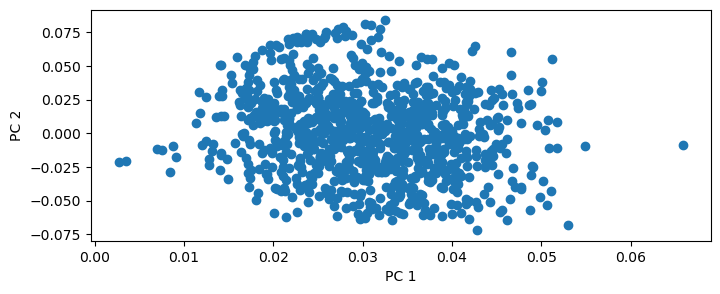

In [56]:
plt.figure(figsize=(8,3))
plt.scatter(pca.components_[0,:], pca.components_[1,:])
plt.xlabel("PC 1"); plt.ylabel("PC 2")

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 1000.

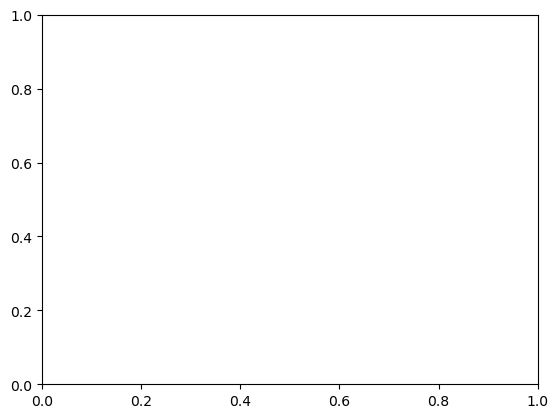

In [57]:
plt.scatter(pca.components_[0,:], pca.components_[1,:],
            color=colorlabels100, figsize=(8,3))
plt.xlabel("PC 1"); plt.ylabel("PC 2")

In [59]:
# This is a sample of 1000 points. 
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels1k = []
for l in labels[0:1000]:
    colorlabels1k.append(h[l])
colorlabels1k[0:50]

colorlabelsall = []
for l in labels:
    colorlabelsall.append(h[l])
colorlabelsall[0:50]

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange']

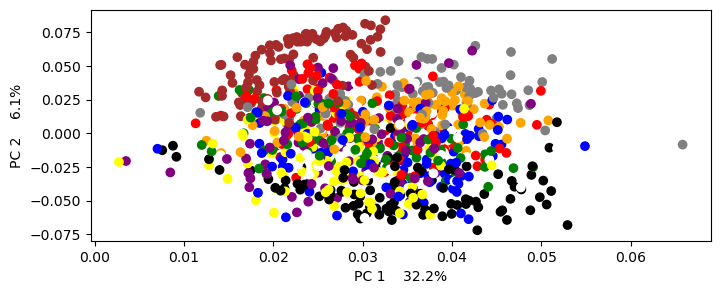

In [61]:
plt.figure( figsize=(8,3))
plt.scatter(pca.components_[0,:], pca.components_[1,:], 
            color=colorlabels1k)
plt.xlabel("PC 1    "+"{:.1f}".format(pca.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca.explained_variance_ratio_[1] * 100) + "%"); 

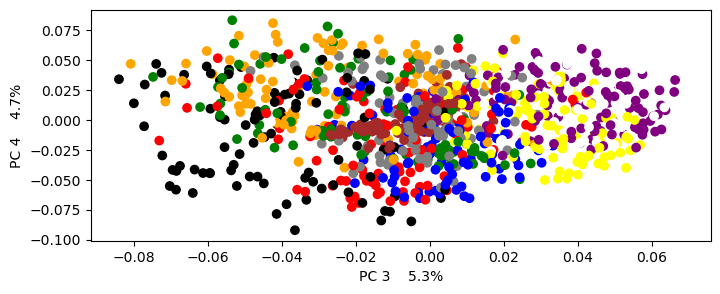

In [62]:
plt.figure( figsize=(8,3))
plt.scatter(pca.components_[2,:], pca.components_[3,:], color=colorlabels1k)
plt.xlabel("PC 3    "+"{:.1f}".format(pca.explained_variance_ratio_[2] * 100) + "%"); 
plt.ylabel("PC 4    "+"{:.1f}".format(pca.explained_variance_ratio_[3] * 100) + "%"); 

In [ ]:
# A little disappointing, 1000 digits fed into PCA and plotted. 
# Let us try TSNE on this 1000 sample by 30-dimensional PCA

In [63]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=.1, 
                  init='random').fit(pca.components_.T)

In [64]:
X_embedded

TSNE(init='random', learning_rate=0.1)

In [ ]:
dir(X_embedded)

In [65]:
X_embedded.embedding_.shape

(1000, 2)

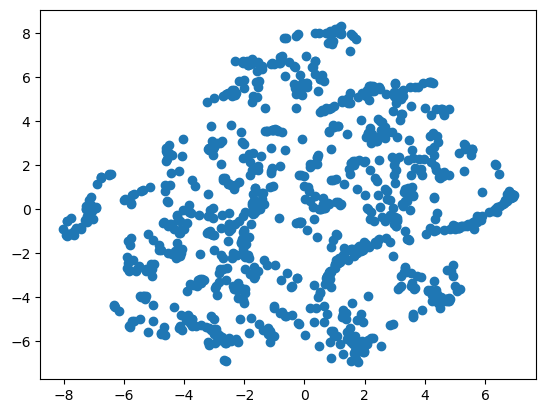

In [66]:
# We want to plot embedding_[:,1] against embedding_[:,0] 
plt.figure( figsize=(8,3))
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1])

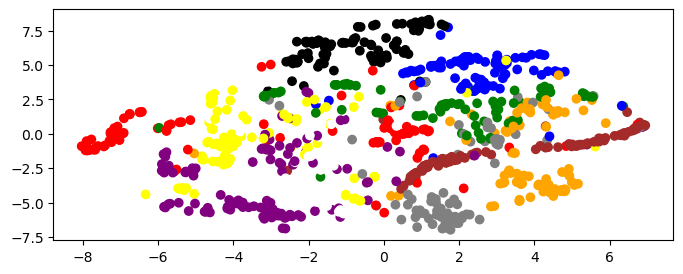

In [67]:
# And add label colors
plt.figure( figsize=(8,3))
plt.scatter(X_embedded.embedding_[:,0], 
            X_embedded.embedding_[:,1], 
            color=colorlabels1k)

In [ ]:
# This is a little more satisfying than [blind] PCA, but 
# less than perfect.  

In [68]:
# Just stabbing around in the dark, try PCA (which reduces
# dimensions on the cheap) THEN apply tSNE ?

In [69]:
# Fit 50-component PCA on all the data
pca50=PCA(n_components=50)
pca50.fit(digits.T)

PCA(n_components=50)

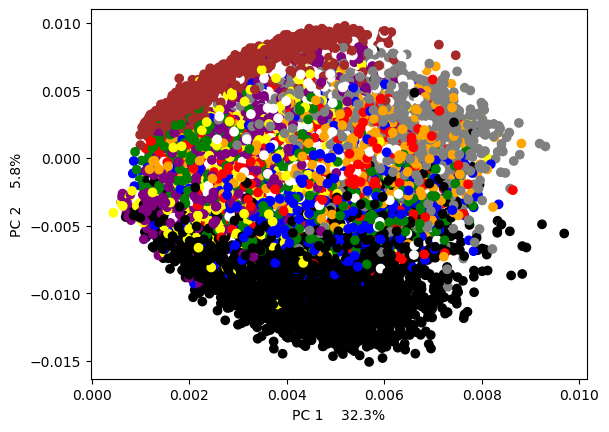

In [70]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [71]:
pca50.components_.shape

(50, 60000)

In [72]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)

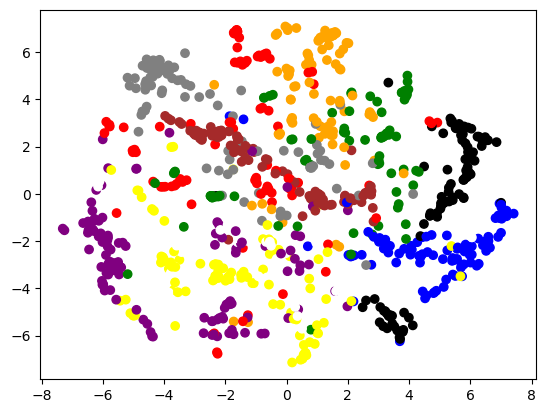

In [73]:
plt.scatter(TSNE1K.embedding_[:,0], TSNE1K.embedding_[:,1], color=colorlabelsall[0:1000])

In [74]:
# 'Kay.. not stunningly beautiful... maybe add more data?
TSNE4K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:4000].T)

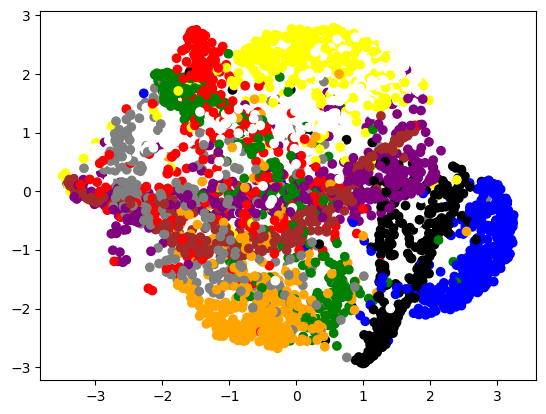

In [75]:
plt.scatter(TSNE4K.embedding_[:,0], TSNE4K.embedding_[:,1], color=colorlabelsall[0:4000])

In [ ]:
# Wait, this is qualitatively different from TSNE with n=1k 

# We can see that the TSNE procedure for drawing pretty 2d pictures that 
# reflect concentrations of point density in high dimensional spaces
# is sensitive to number of points and tuning parameters; 
# and be warned, it is not deterministic, so you don't get the
# same clouds each time you run it.  But it sure is pretty.

In [76]:
# If 4K was good, maybe 10K is better?  (This takes a minute) 
TSNE10K = TSNE(n_components=2, learning_rate=1.5, init="random").fit(pca50.components_[:,0:10000].T)

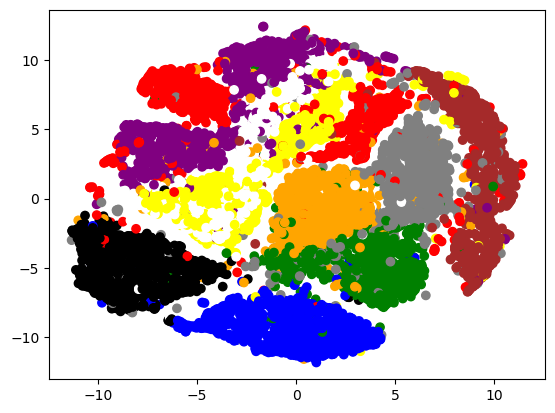

In [77]:
plt.scatter(TSNE10K.embedding_[:,0], TSNE10K.embedding_[:,1], color=colorlabelsall[0:10000])